<a href="https://colab.research.google.com/github/chakshu-dhannawat/Bitcoin-Price-Prediction/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pylab import rcParams
from prettytable import PrettyTable
# For Evalution we will use these library
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.metrics import r2_score


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PRML_Bitcoin/bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [ ]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [ ]:
df.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

There are no null values in the dataset.

**Converting Date to datetime format for easy processing**

In [ ]:
month = {'Jan':'01',
		'Feb':'02',
		'Mar':'03',
		'Apr':'04',
		'May':'05',
		'Jun':'06',
		'Jul':'07',
		'Aug':'08',
		'Sep':'09',
		'Oct':'10',
		'Nov':'11',
		'Dec':'12'}

def date_format(x):
  arr = x.split()
  arr[0] = month[arr[0]]
  arr[1] = arr[1][0:-1]
  return str(arr[0]+'-' + arr[1]+ '-' + arr[2])


In [ ]:
df['Date'] = df['Date'].apply(date_format)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,07-31-2017,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,07-30-2017,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,07-29-2017,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,07-28-2017,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,07-27-2017,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y')

##Exploratory data analysis

In [ ]:
# Printing the start date and End date of the dataset
ed=df.iloc[0][0]
sd=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2013-04-28 00:00:00
Ending Date 2017-07-31 00:00:00


Plotting only the closing price

In [ ]:
# Lets First Take all the Close Price 
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1556, 2)


In [ ]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2013-2017', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

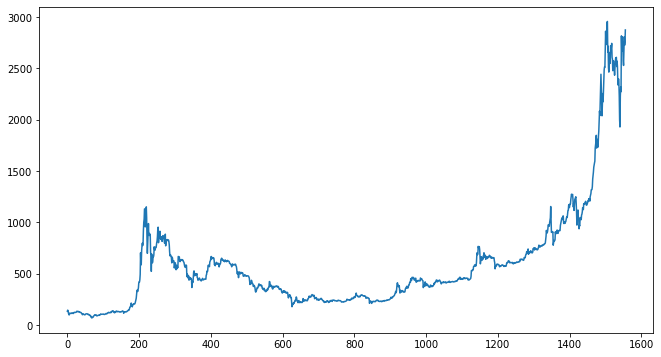

In [ ]:
plt.plot(closedf2.Close)

As we can see, there are many fluctuations, and it will be difficult to predict such a data.

Plotting percent Change wrt previous month

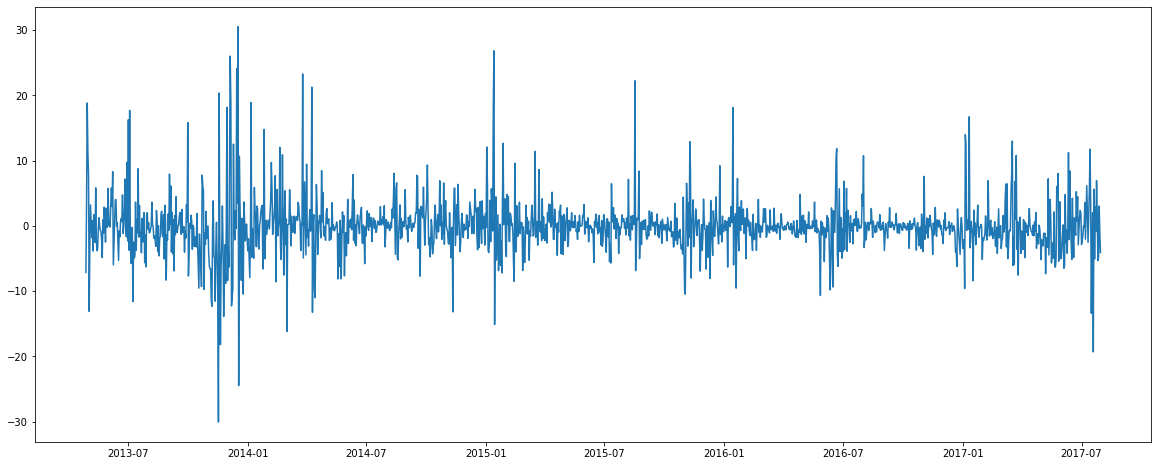

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(closedf.Date,closedf.Close.pct_change().mul(100))


Trying Rolling functions

In [ ]:
closedf['Date'] = pd.to_datetime(closedf['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



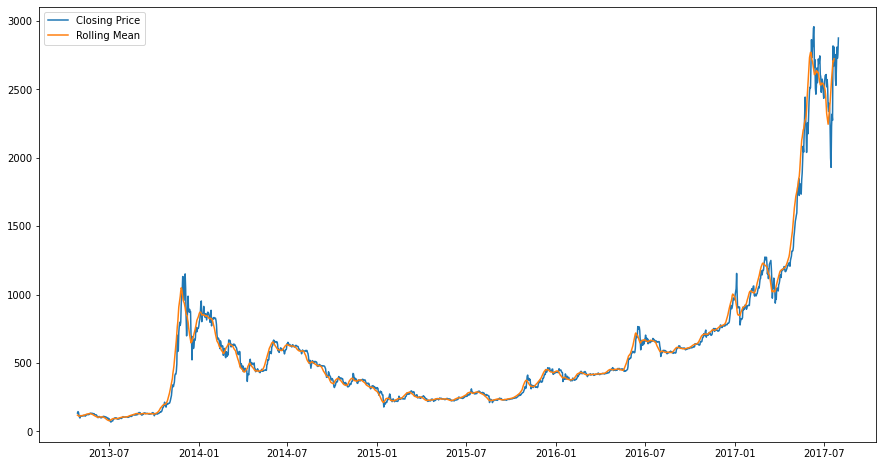

In [ ]:
plt.figure(figsize=(15, 8))
rolling_close = closedf.Close.rolling(10).mean()
plt.plot(closedf.Date, closedf.Close)
plt.plot(closedf.Date, rolling_close)

# closedf.Close.plot(xticks= closedf.Date)
# rolling_close.plot(xticks= closedf.Date)
plt.legend(['Closing Price','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

We use rolling to reduce noise(minor fluctutions) in the dataset

In [ ]:
closedf2 = closedf.iloc[::-1].reset_index()

##Checking Trends, Seasonality and Noise

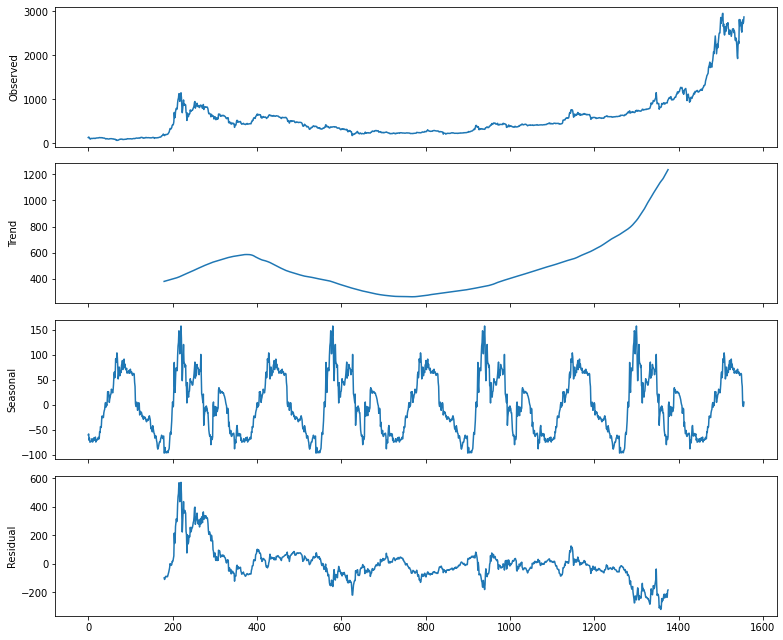

In [ ]:
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(closedf2['Close'],freq=360) # The frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

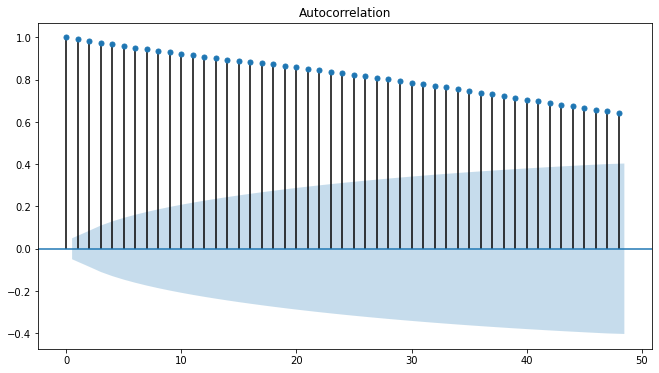

In [ ]:
plot_acf(closedf2['Close'].values, lags=48)
plt.show()

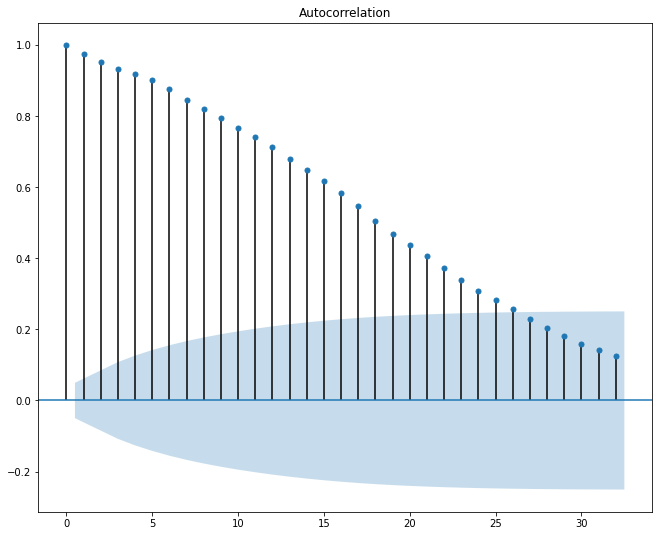

In [ ]:
plot_acf(decomposed_google_volume.seasonal)
plt.show()

##Trying basic prediction models

In [ ]:
regressor_df = closedf2.copy(deep=True)

In [ ]:
regressor_df['Close_price_LastMonth']=regressor_df['Close'].shift(+30)
regressor_df['Close_price_2Monthsback']=regressor_df['Close'].shift(+60)
regressor_df['Close_price_3Monthsback']=regressor_df['Close'].shift(+90)
regressor_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Date,Close,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,...,Close_24,Close_25,Close_26,Close_27,Close_28,Close_29,Close_30,Close_price_LastMonth,Close_price_2Monthsback,Close_price_3Monthsback
30,2013-05-28,129.00,129.75,133.48,131.98,133.20,126.70,123.89,122.88,122.00,...,112.50,97.75,105.21,116.99,139.00,144.54,134.21,NaN,NaN,NaN
31,2013-05-29,132.30,129.00,129.75,133.48,131.98,133.20,126.70,123.89,122.88,...,115.91,112.50,97.75,105.21,116.99,139.00,144.54,NaN,NaN,NaN
32,2013-05-30,128.80,132.30,129.00,129.75,133.48,131.98,133.20,126.70,123.89,...,112.30,115.91,112.50,97.75,105.21,116.99,139.00,NaN,NaN,NaN
33,2013-05-31,129.00,128.80,132.30,129.00,129.75,133.48,131.98,133.20,126.70,...,111.50,112.30,115.91,112.50,97.75,105.21,116.99,NaN,NaN,NaN
34,2013-06-01,129.30,129.00,128.80,132.30,129.00,129.75,133.48,131.98,133.20,...,113.57,111.50,112.30,115.91,112.50,97.75,105.21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2017-07-27,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,2817.60,2273.43,...,2564.06,2506.47,2434.55,2480.84,2539.32,2574.79,2552.45,2552.45,2155.80,1316.48
1552,2017-07-28,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,2817.60,...,2601.64,2564.06,2506.47,2434.55,2480.84,2539.32,2574.79,2574.79,2255.61,1321.79
1553,2017-07-29,2726.45,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,...,2601.99,2601.64,2564.06,2506.47,2434.55,2480.84,2539.32,2539.32,2175.47,1347.89
1554,2017-07-30,2757.18,2726.45,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,...,2608.56,2601.99,2601.64,2564.06,2506.47,2434.55,2480.84,2480.84,2286.41,1421.60


In [ ]:
regressor_df=regressor_df.dropna()
regressor_df

,index,Date,Close
0,1555,2013-04-28,134.21
1,1554,2013-04-29,144.54
2,1553,2013-04-30,139.00
3,1552,2013-05-01,116.99
4,1551,2013-05-02,105.21
...,...,...,...
1551,4,2017-07-27,2671.78
1552,3,2017-07-28,2809.01
1553,2,2017-07-29,2726.45
1554,1,2017-07-30,2757.18


In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100, random_state=1)

In [ ]:
import numpy as np
x1,x2,x3,y=regressor_df['Close_price_LastMonth'],regressor_df['Close_price_2Monthsback'],regressor_df['Close_price_3Monthsback'],regressor_df['Close']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[  94.12  101.44  129.  ]
 [  99.76   94.65  132.3 ]
 [ 101.2    94.99  128.8 ]
 ...
 [2539.32 2175.47 1347.89]
 [2480.84 2286.41 1421.6 ]
 [2434.55 2407.88 1452.82]]


In [ ]:
X_train,X_test,y_train,y_test=final_x[:-100],final_x[-100:],y[:-100],y[-100:]

In [ ]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(random_state=1)

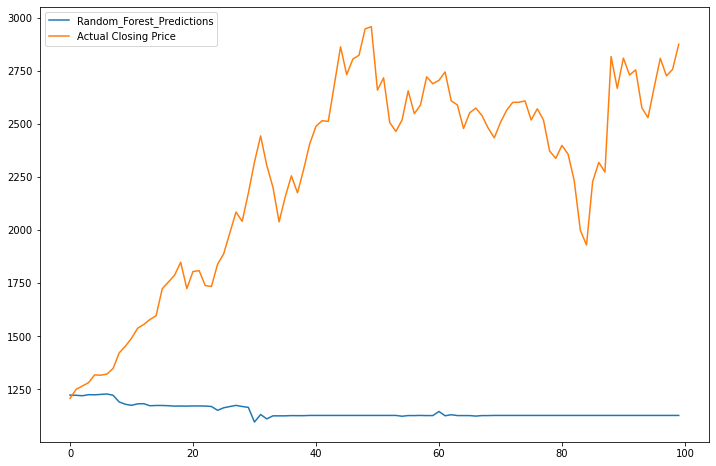

In [ ]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.show()

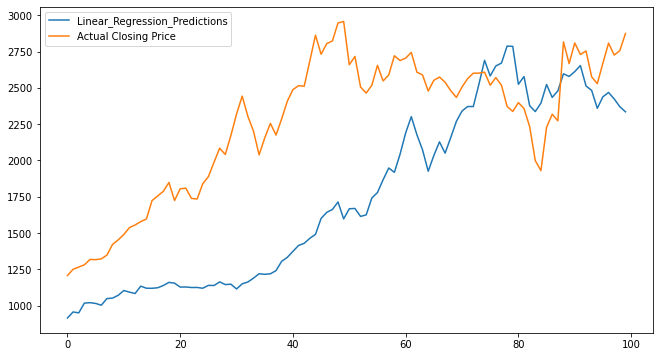

In [ ]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [ ]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 1222.8860865014528
Mean Squared Error for Linear Regression Model is: 677.8941588551744


##Trying Linear regression extensively

We will use the data of all the 30 previous days to make the prediction of future price.

In [ ]:
regressor_df.drop('index',axis=1, inplace=True)

In [ ]:
regressor_df.head()

,Date,Close
0,2013-04-28,134.21
1,2013-04-29,144.54
2,2013-04-30,139.00
3,2013-05-01,116.99
4,2013-05-02,105.21


In [ ]:
for i in range(1,31):
  temp_str = 'Close_'+ str(i)
  regressor_df[temp_str]=regressor_df['Close'].shift(+i)

regressor_df

,Date,Close,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,...,Close_21,Close_22,Close_23,Close_24,Close_25,Close_26,Close_27,Close_28,Close_29,Close_30
0,2013-04-28,134.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-29,144.54,134.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-04-30,139.00,144.54,134.21,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-05-01,116.99,139.00,144.54,134.21,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-05-02,105.21,116.99,139.00,144.54,134.21,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2017-07-27,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,2817.60,2273.43,...,2608.56,2601.99,2601.64,2564.06,2506.47,2434.55,2480.84,2539.32,2574.79,2552.45
1552,2017-07-28,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,2817.60,...,2518.66,2608.56,2601.99,2601.64,2564.06,2506.47,2434.55,2480.84,2539.32,2574.79
1553,2017-07-29,2726.45,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,...,2571.34,2518.66,2608.56,2601.99,2601.64,2564.06,2506.47,2434.55,2480.84,2539.32
1554,2017-07-30,2757.18,2726.45,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,...,2518.44,2571.34,2518.66,2608.56,2601.99,2601.64,2564.06,2506.47,2434.55,2480.84


In [ ]:
regressor_df=regressor_df.dropna()
regressor_df

,Date,Close,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,...,Close_21,Close_22,Close_23,Close_24,Close_25,Close_26,Close_27,Close_28,Close_29,Close_30
30,2013-05-28,129.00,129.75,133.48,131.98,133.20,126.70,123.89,122.88,122.00,...,111.50,112.30,115.91,112.50,97.75,105.21,116.99,139.00,144.54,134.21
31,2013-05-29,132.30,129.00,129.75,133.48,131.98,133.20,126.70,123.89,122.88,...,113.57,111.50,112.30,115.91,112.50,97.75,105.21,116.99,139.00,144.54
32,2013-05-30,128.80,132.30,129.00,129.75,133.48,131.98,133.20,126.70,123.89,...,112.67,113.57,111.50,112.30,115.91,112.50,97.75,105.21,116.99,139.00
33,2013-05-31,129.00,128.80,132.30,129.00,129.75,133.48,131.98,133.20,126.70,...,117.20,112.67,113.57,111.50,112.30,115.91,112.50,97.75,105.21,116.99
34,2013-06-01,129.30,129.00,128.80,132.30,129.00,129.75,133.48,131.98,133.20,...,115.24,117.20,112.67,113.57,111.50,112.30,115.91,112.50,97.75,105.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2017-07-27,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,2817.60,2273.43,...,2608.56,2601.99,2601.64,2564.06,2506.47,2434.55,2480.84,2539.32,2574.79,2552.45
1552,2017-07-28,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,2817.60,...,2518.66,2608.56,2601.99,2601.64,2564.06,2506.47,2434.55,2480.84,2539.32,2574.79
1553,2017-07-29,2726.45,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,...,2571.34,2518.66,2608.56,2601.99,2601.64,2564.06,2506.47,2434.55,2480.84,2539.32
1554,2017-07-30,2757.18,2726.45,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,...,2518.44,2571.34,2518.66,2608.56,2601.99,2601.64,2564.06,2506.47,2434.55,2480.84


In [ ]:
import numpy as np
y=regressor_df['Close']
y = np.array(y)
X_temp = regressor_df.iloc[:, 2:32]
X_temp = np.array(X_temp) 
print(X_temp.shape)

(1526, 30)


In [ ]:
print(X_temp)

[[ 104.    103.95  102.74 ...  128.8   132.3   129.  ]
 [ 101.44  104.    103.95 ...  129.    128.8   132.3 ]
 [  94.65  101.44  104.   ...  129.3   129.    128.8 ]
 ...
 [2809.01 2671.78 2529.45 ... 2434.55 2480.84 2539.32]
 [2726.45 2809.01 2671.78 ... 2506.47 2434.55 2480.84]
 [2757.18 2726.45 2809.01 ... 2564.06 2506.47 2434.55]]


In [ ]:
from sklearn.linear_model import LinearRegression
lin_model_30=LinearRegression()

In [ ]:
X_train,X_test,y_train,y_test=X_temp[:-100],X_temp[-100:],y[:-100],y[-100:]

In [ ]:
lin_model_30.fit(X_train,y_train)

LinearRegression()

##Predictions on test data

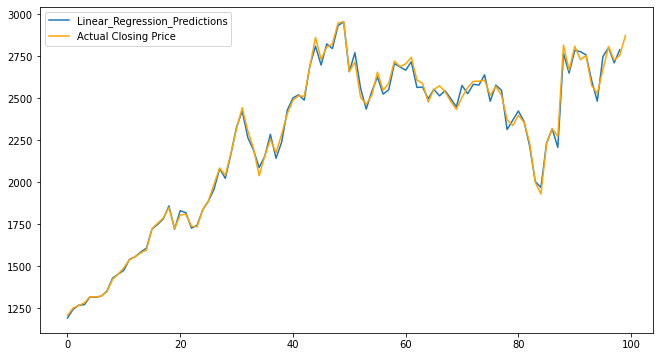

In [ ]:
lin_pred_30=lin_model_30.predict(X_test)
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred_30[1:],label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Closing Price', color='orange')

plt.legend(loc="upper left")
plt.show()

In [ ]:
print('R2-SCORE: ')
print(r2_score(lin_pred_30[1:], y_test[:-1]))
print('MSE:')
print(mean_squared_error(lin_pred_30[1:], y_test[:-1]))

R2-SCORE: 
0.9965985733505773
MSE:
765.1984945267263


##Doing future forecasting

In [ ]:
X_final_pred = []
X_temp2=[]
X1 = X_temp[-1]
X_final_pred = X1
X_final_pred = list(X_final_pred)
DAY=30
def forecast(days=30):
  day=1
  while(day<days):
    X_temp2 = X_final_pred[-30:]
    #print(X_temp2)
    X_temp2 = np.array(X_temp2)
    X_temp2 = X_temp2[::-1]
    X_temp2 = X_temp2.reshape(1,-1)
    pred = lin_model_30.predict(X_temp2)
    X_final_pred.append(pred[0])
    day = day+1
  return X_final_pred
X_forecast = forecast(days=20)

In [ ]:
X1_true = list(regressor_df['Close'])
X1_forecast = list(X1_true.copy())


In [ ]:
for i in range(30,len(X_forecast)):
  X1_forecast.append(X_forecast[i])

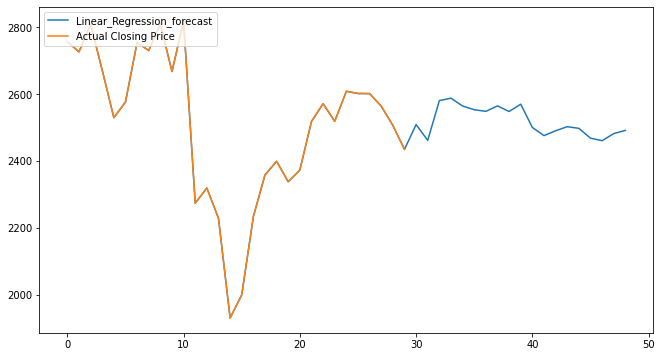

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(X_forecast,label='Linear_Regression_forecast')
plt.plot(X1,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.show()

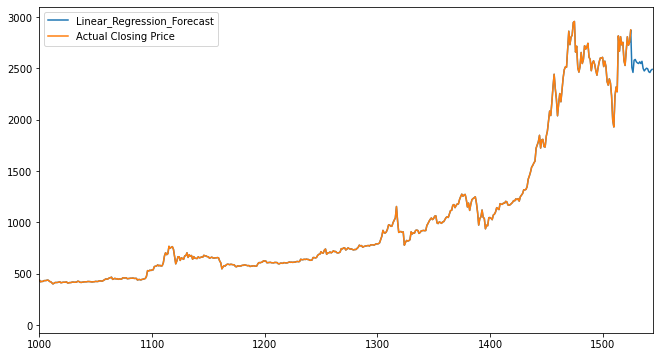

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(X1_forecast,label='Linear_Regression_Forecast')
plt.plot(X1_true,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.xlim(1000, len(X1_forecast) )
plt.show()

Checking difference between forecasted data and test data

In [ ]:
X_final_pred = []
X_temp2=[]
X1 = X_train[-1]
X_final_pred = X1
X_final_pred = list(X_final_pred)
DAY=30
def forecast(days=30):
  day=1
  while(day<days):
    X_temp2 = X_final_pred[-30:]
    X_temp2 = np.array(X_temp2)
    X_temp2 = X_temp2[::-1]
    X_temp2 = X_temp2.reshape(1,-1)
    pred = lin_model_30.predict(X_temp2)
    X_final_pred.append(pred[0])
    day = day+1
  return X_final_pred
X_forecast_new = forecast(days=15)
X_forecast2 = X_forecast_new[30:]

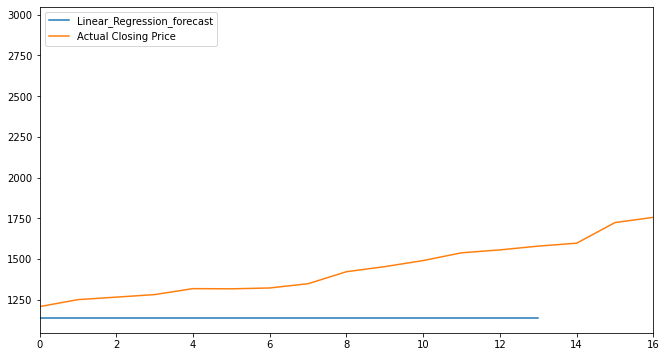

In [ ]:
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(X_forecast2,label='Linear_Regression_forecast')
plt.plot(y_test,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.xlim(0,16)
plt.show()

In [ ]:
print('R2-SCORE: ')
print(r2_score(X_forecast2, y_test[0:14]))
print('MSE')
print(mean_squared_error(X_forecast2, y_test[0:14]))

R2-SCORE: 
-2.1918510399975465e+28
MSE
73655.42786428779


##Trying other supervised learning models

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train,verbose=True) 

[11:05:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgb_pred_30=model_xgb.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(xgb_pred_30,label='XGB_Regression_Predictions')
plt.plot(y_test,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.show()

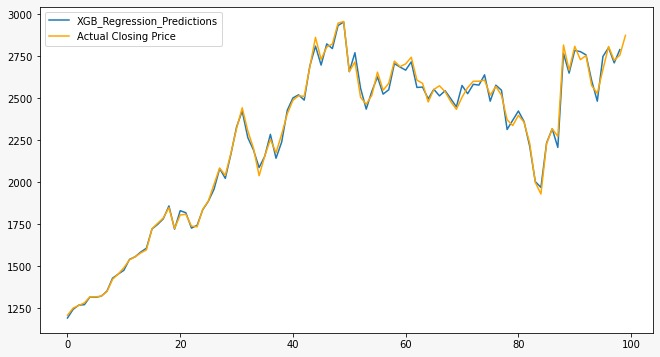

In [ ]:
print('R2-SCORE: ')
print(r2_score(xgb_pred_30[1:], y_test[:-1]))
print('MSE:')
print(mean_squared_error(xgb_pred_30[1:], y_test[:-1]))

R2-SCORE: 
0.9966156755443886
MSE:
761.7109076894526


LightGBM Model

In [ ]:
import lightgbm as ltb
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
predicted_y_lgbm = model.predict(X_test)
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(predicted_y_lgbm,label='LGBM_Regression_Predictions')
plt.plot(y_test,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.show()

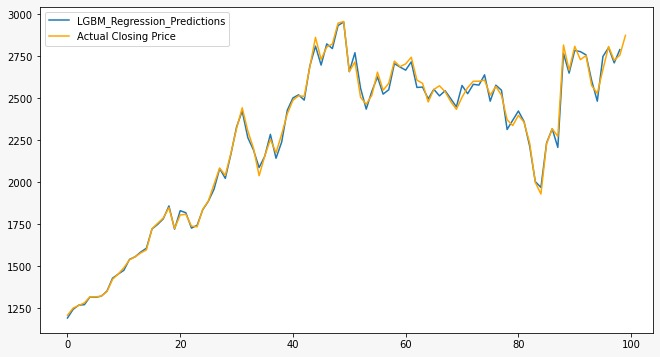

In [ ]:
print('R2-SCORE: ')
print(r2_score(predicted_y_lgbm[1:], y_test[:-1]))
print('MSE:')
print(mean_squared_error(predicted_y_lgbm[1:], y_test[:-1]))

R2-SCORE: 
0.9966156755443886
MSE:
761.7109076894526


##Trying Ridge Regression as variables are highly correlated

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model_ridge = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model
model_ridge.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % model_ridge.alpha_)

alpha: 0.990000


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model_ridge = RidgeCV(alphas=np.arange(0.8, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
model_ridge.fit(X_train, y_train)

RidgeCV(alphas=array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

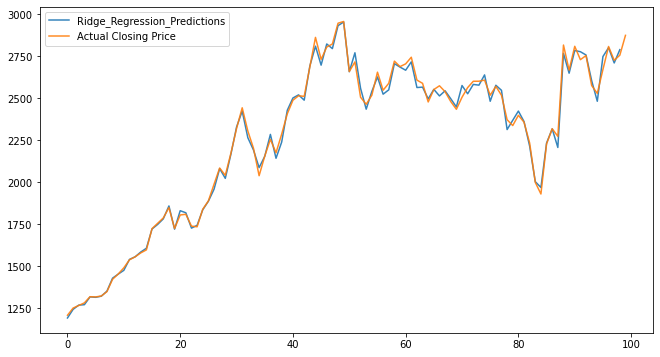

In [ ]:
ridge_pred_30=model_ridge.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(ridge_pred_30[1:],label='Ridge_Regression_Predictions', alpha=0.9)
plt.plot(y_test,label='Actual Closing Price', alpha=0.9)
plt.legend(loc="upper left")
plt.show()

In [ ]:
print('R2-SCORE: ')
print(r2_score(ridge_pred_30[1:], y_test[:-1]))
print('MSE: ')
print(mean_squared_error(ridge_pred_30[1:], y_test[:-1]))

R2-SCORE: 
0.99659858952531
MSE: 
765.1948025569344


##Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [ ]:
from sklearn.linear_model import Lasso
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=94.45764205214265)

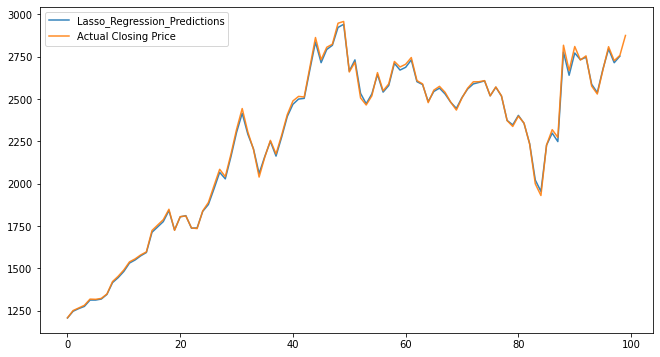

In [ ]:
lasso_pred_30=lasso_best.predict(X_test)
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lasso_pred_30[1:],label='Lasso_Regression_Predictions', alpha=0.9)
plt.plot(y_test,label='Actual Closing Price', alpha=0.9)
plt.legend(loc="upper left")
plt.show()

In [ ]:
print('R2-SCORE: ')
print(r2_score(lasso_pred_30[1:], y_test[:-1]))
print('MSE: ')
print(mean_squared_error(lasso_pred_30[1:], y_test[:-1]))

R2-SCORE: 
0.9992238532125028
MSE: 
174.06063702255423


##Elastic Net Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model_elastic, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -12.955
Config: {'alpha': 100.0, 'l1_ratio': 0.99}


In [ ]:
from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet(alpha = 100, l1_ratio=0.99)
model_elastic.fit(X_train, y_train)

ElasticNet(alpha=100, l1_ratio=0.99)

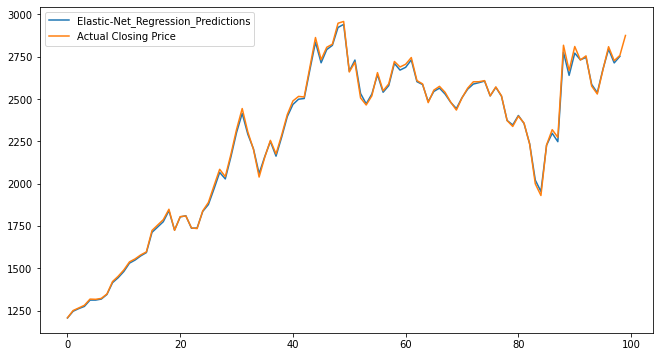

In [ ]:
Elastic_pred_30=model_elastic.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(Elastic_pred_30[1:],label='Elastic-Net_Regression_Predictions')
plt.plot(y_test,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.show()

In [ ]:
print('R2-SCORE: ')
print(r2_score(Elastic_pred_30[1:], y_test[:-1]))
print('MSE:')
print(mean_squared_error(Elastic_pred_30[1:], y_test[:-1]))

R2-SCORE: 
0.9991929320958629
MSE:
180.90069604086892


Since Elastic-Net model is giving best results, perform forecasting using Elastic-Net Model

In [ ]:
X_final_pred = []
X_temp2=[]
X1 = X_train[-1]
X_final_pred = X1
X_final_pred = list(X_final_pred)
DAY=30
def forecast(days=30):
  day=1
  while(day<days):
    X_temp2 = X_final_pred[-30:]
    X_temp2 = np.array(X_temp2)
    X_temp2 = X_temp2[::-1]
    X_temp2 = X_temp2.reshape(1,-1)
    pred = model_elastic.predict(X_temp2)
    X_final_pred.append(pred[0])
    day = day+1
  return X_final_pred
X_forecast_new = forecast(days=15)
X_forecast2 = X_forecast_new[30:]


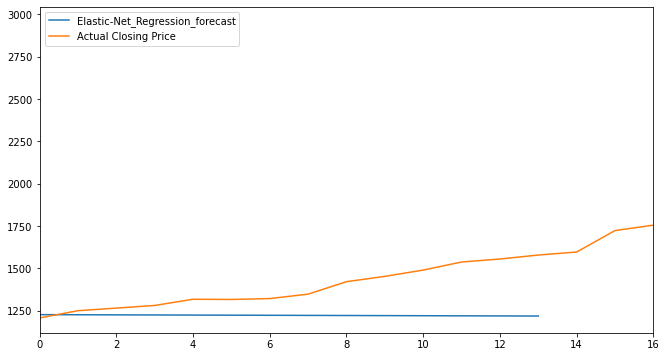

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(X_forecast2,label='Elastic-Net_Regression_forecast')
plt.plot(y_test,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.xlim(0,16)
plt.show()

In [ ]:
print('R2-SCORE: ')
print(r2_score(X_forecast2, y_test[0:14]))

R2-SCORE: 
-6127.921327415046


In [ ]:
X_final_pred = []
X_temp2=[]
X1 = X_temp[-1]
X_final_pred = X1
X_final_pred = list(X_final_pred)
DAY=30
def forecast(days=30):
  day=1
  while(day<days):
    X_temp2 = X_final_pred[-30:]
    #print(X_temp2)
    X_temp2 = np.array(X_temp2)
    X_temp2 = X_temp2[::-1]
    X_temp2 = X_temp2.reshape(1,-1)
    pred = model_elastic.predict(X_temp2)
    X_final_pred.append(pred[0])
    day = day+1
  return X_final_pred
X_forecast = forecast(days=20)

In [ ]:
X1_true = list(regressor_df['Close'])
X1_forecast = list(X1_true.copy())

In [ ]:
for i in range(30,len(X_forecast)):
  X1_forecast.append(X_forecast[i])

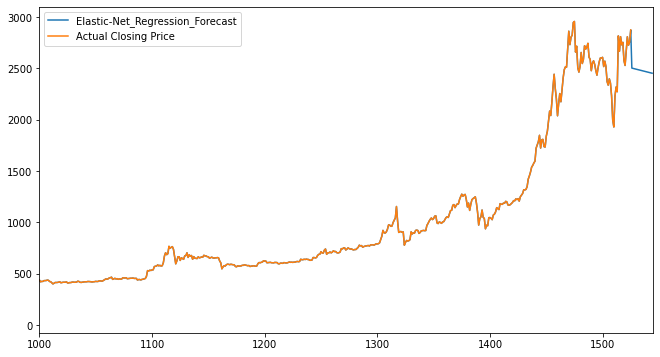

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(X1_forecast,label='Elastic-Net_Regression_Forecast')
plt.plot(X1_true,label='Actual Closing Price')
plt.legend(loc="upper left")
plt.xlim(1000, len(X1_forecast))
plt.show()

##Trying ARIMA model

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(closedf2['Close'])

1. ADF :  2.5355885873886206
2. P-Value :  0.9990604352222925
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1531
5. Critical Values :
	 1% :  -3.4346284441307184
	 5% :  -2.863429668579316
	 10% :  -2.5677760318409732


##Since Value of 'P-Value' is very high, the data is not stationary, and thus, ARIMA models will not be of much significance.

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 4.3 MB/s 
     |████████████████████████████████| 9.8 MB 44.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(closedf2['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1556
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -7943.343
Date:                Wed, 27 Apr 2022   AIC                          15898.686
Time:                        09:01:07   BIC                          15930.778
Sample:                             0   HQIC                         15910.620
                               - 1556                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8523      0.009    -93.558      0.000      -0.870      -0.834
ar.L2         -0.7024      0.012    -58.977      0.000      -0.726      -0.679
ar.L3         -0.5475      0.011    -50.801      0.000      -0.569      -0.526
ar.L4         -0.3405      0.009    -38.414      0.000      -0.358      -0.323
ar.L5         -0.1566      0.009    -17.274      0.000      -0.174      -0.139
sigma2      1615.3360     14.672    110.099      0.000    1586.580    1644.092
===================================================================================
Ljung-Box (Q):                      287.92   Jarque-Bera (JB):            114839.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.00   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(df.shape)
train=closedf2.iloc[:-100]
test=closedf2.iloc[-100:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1556, 7)
(1456, 3) (100, 3)
index                     99
Date     2017-04-23 00:00:00
Close                1207.21
Name: 1456, dtype: object index                      0
Date     2017-07-31 00:00:00
Close                2875.34
Name: 1555, dtype: object


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_arima=ARIMA(train['Close'],order=(5,2,0))
model_arima=model_arima.fit()
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                 1454
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -6774.750
Method:                       css-mle   S.D. of innovations             25.532
Date:                Wed, 27 Apr 2022   AIC                          13563.499
Time:                        09:04:52   BIC                          13600.474
Sample:                             2   HQIC                         13577.295
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0082      0.165      0.050      0.960      -0.315       0.331
ar.L1.D2.Close    -0.8552      0.025    -33.733      0.000      -0.905      -0.805
ar.L2.D2.Close    -0.7782      0.031    -24.747      0.000      -0.840      -0.717
ar.L3.D2.Close    -0.7040      0.033    -21.591      0.000      -0.768      -0.640
ar.L4.D2.Close    -0.4772      0.031    -15.190      0.000      -0.539      -0.416
ar.L5.D2.Close    -0.2551      0.025    -10.075      0.000      -0.305      -0.205
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4761           -1.1198j            1.2168           -0.1860
AR.2            0.4761           +1.1198j            1.2168            0.1860
AR.3           -1.3371           -0.0000j            1.3371           -0.5000
AR.4           -0.7427           -1.1951j            1.4071           -0.3385
AR.5           -0.7427           +1.1951j            1.4071            0.3385
-----------------------------------------------------------------------------
"""

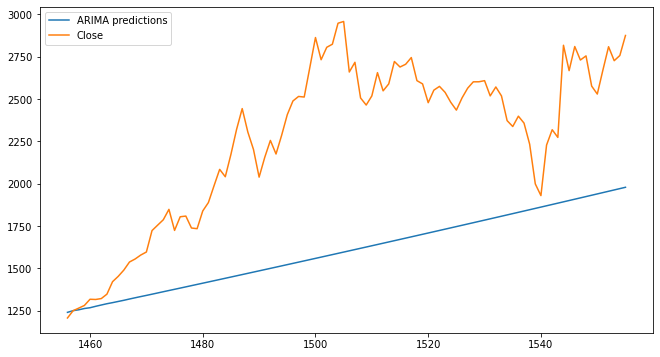

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model_arima.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Close'].plot(legend=True)

##Trying LSTM Model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
values = closedf2['Close'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
train_size = int(len(scaled) * 0.85)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

1322 234


In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

1321
233


Reshaping X for training

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=False)

Epoch 1/300
14/14 [==============================] - 3s 45ms/step - loss: 0.0887 - val_loss: 0.4206
Epoch 2/300
14/14 [==============================] - 0s 6ms/step - loss: 0.0556 - val_loss: 0.3620
Epoch 3/300
14/14 [==============================] - 0s 5ms/step - loss: 0.0516 - val_loss: 0.3300
Epoch 4/300
14/14 [==============================] - 0s 6ms/step - loss: 0.0516 - val_loss: 0.3165
Epoch 5/300
14/14 [==============================] - 0s 5ms/step - loss: 0.0498 - val_loss: 0.3100
Epoch 6/300
14/14 [==============================] - 0s 5ms/step - loss: 0.0478 - val_loss: 0.3006
Epoch 7/300
14/14 [==============================] - 0s 5ms/step - loss: 0.0461 - val_loss: 0.2883
Epoch 8/300
14/14 [==============================] - 0s 6ms/step - loss: 0.0445 - val_loss: 0.2766
Epoch 9/300
14/14 [==============================] - 0s 6ms/step - loss: 0.0428 - val_loss: 0.2646
Epoch 10/300
14/14 [==============================] - 0s 5ms/step - loss: 0.0410 - val_loss: 0.2520
Epoch 11

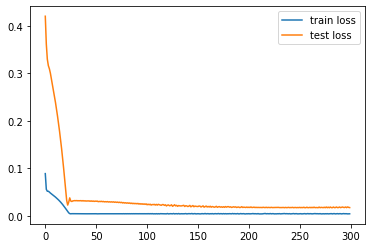

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

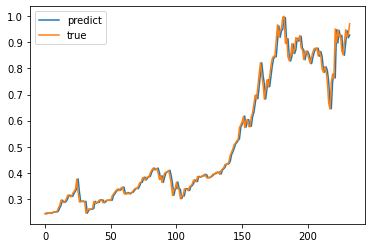

In [ ]:
yhat = model.predict(testX)
plt.plot(yhat, label='predict')
plt.plot(testY, label='true')
plt.legend()
plt.show()

In [ ]:
print('R2_Score: ')
print(r2_score(yhat, testY))
print('MSE:')
print(mean_squared_error(yhat, testY))

R2_Score: 
0.9868347237754554
MSE:
0.0007453865


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


##Comparing the Models Used

In [ ]:
x = PrettyTable()
x.field_names = ["Model Name", "R2_Score", "Mean_squared_error"]

x.add_row(['RandomForestRegressor(Using only past 3 days as the features)','-100.49', '1.5e6'])
x.add_row(['Linear Regression(Using only past 3 days as the features)','0.458', '0.4e6'])
x.add_row(['Linear_Regression(Using past 30 days as the features)','0.99659857', '765.198'])


print(x)

+---------------------------------------------------------------+------------+--------------------+
|                           Model Name                          |  R2_Score  | Mean_squared_error |
+---------------------------------------------------------------+------------+--------------------+
| RandomForestRegressor(Using only past 3 days as the features) |  -100.49   |       1.5e6        |
|   Linear Regression(Using only past 3 days as the features)   |   0.458    |       0.4e6        |
|     Linear_Regression(Using past 30 days as the features)     | 0.99659857 |      765.198       |
+---------------------------------------------------------------+------------+--------------------+


In [ ]:
models = pd.DataFrame({
    'Model': [ 'Linear Regressor', 'XGB Regressor','LightGBM Regressor','Ridge regression','Lasso Regressor ','Elastic-Net Regressor','MultiLayerPerceptron regressor','SVR', 'LSTM(RNN) '],
    'R2_Score': [0.996598, 0.996215, 0.996467,0.996592,0.999224,0.999193,0.9879,0.876588 ,0.986834]})
models.sort_values(by='R2_Score', ascending=False)

,Model,R2_Score
4,Lasso Regressor,0.999224
5,Elastic-Net Regressor,0.999193
0,Linear Regressor,0.996598
3,Ridge regression,0.996592
2,LightGBM Regressor,0.996467
1,XGB Regressor,0.996215
6,MultiLayerPerceptron regressor,0.987900
8,LSTM(RNN),0.986834
7,SVR,0.876588


##End-to-end Pipeline

In [ ]:
def forecast(days=30):
  day=1
  while(day<days):
    X_temp2 = X_final_pred[-30:]
    #print(X_temp2)
    X_temp2 = np.array(X_temp2)
    X_temp2 = X_temp2[::-1]
    X_temp2 = X_temp2.reshape(1,-1)
    pred = lasso_best.predict(X_temp2)
    X_final_pred.append(pred[0])
    day = day+1
  return X_final_pred

In [ ]:
def Get_Prediction(forecasting_days=15):
  X_final_pred = []
  X_temp2=[]
  X1 = X_temp[-1]
  X_final_pred = X1
  X_final_pred = list(X_final_pred)
  X_forecast = forecast(days=forecasting_days)
  plt.rcParams["figure.figsize"] = (11,6)
  plt.plot(X_forecast,label='Lasso_Regression_forecast')
  plt.plot(X1,label='Actual Closing Price')
  plt.legend(loc="upper right")
  plt.show()
  print('The Forecasted Values are as follows(days ahead of 2017-07-31):')
  print(X_forecast[-forecasting_days:])

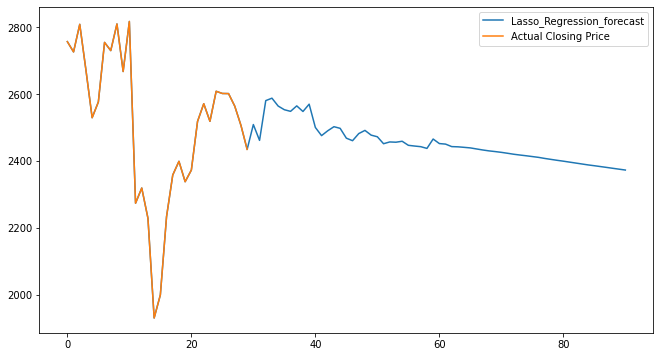

The Forecasted Values are as follows(days ahead of 2017-07-31):
[2410.6947790772565, 2407.490720897523, 2404.662745372162, 2401.8731800003684, 2399.2762145632055, 2396.483705831613, 2393.679722191164, 2390.873671068761, 2388.062147365551, 2385.668484610527, 2383.1118376574723, 2380.5480302846595, 2377.9043301732054, 2375.3107978485077, 2372.744619530963]


In [ ]:
Get_Prediction()